In [1]:
from distribution_generator.distributions import get_rv

mutinfo = 0.2

rv = get_rv(mutinfo,2,2,n_generations=300, min_val=1e-2)
print(rv.joint_dist)
rv2 = get_rv(mutinfo,2,2,n_generations=300, min_val=1e-2)
x,y = rv2.rvs(size=10000)

Best fitness: -2.9503829271776416e-05: 100%|██████████| 300/300 [00:03<00:00, 95.03it/s] 


[[0.24874826 0.33714948]
 [0.40439352 0.00970874]]


[[2433 3410]
 [4053  104]]


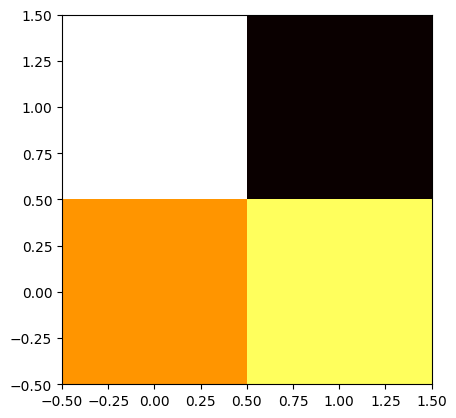

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Count Occurrences of Each Sample

samples = np.concatenate([x,y],axis=1)

grid = np.array([[0,0],[0,0]])
tot = 0

for sample in samples:
    grid[sample[0],sample[1]] += 1
    tot += 1

print(grid)

plt.imshow(grid, cmap='hot', interpolation='nearest', origin='lower')

In [3]:
import numpy as np

dist = np.array([[0.37513464, 0.24989916],
 [0.00970874, 0.36525746]])

# compute kl with uniform distribution

kl = np.sum(dist * np.log(dist / np.array([[0.25,0.25],[0.25,0.25]])))
print(kl)

# compute mutinfo
px = np.sum(dist, axis=1)
py = np.sum(dist, axis=0)
mutinfo = 0
for i in range(2):
    for j in range(2):
        mutinfo += dist[i,j] * np.log(dist[i,j] / (px[i] * py[j]))
print(mutinfo)

# compute entropy
dist = dist.flatten()
entropy = -np.sum(dist * np.log(dist))
print(entropy)

0.2590839288684114
0.20072102883245946
1.127210432251479


In [4]:
from scipy.stats import binom
import numpy as np

# Parameters for the binomial distribution
n = 10  # number of trials
p = 0.25  # probability of success

# Create a binomial distribution
binom_dist = binom(n, p)

# Calculate the probabilities of each possible outcome
probabilities = binom_dist.pmf(np.arange(n + 1))

# Calculate the entropy
entropy_binom = -np.sum(probabilities * np.log(probabilities))
print(entropy_binom)

1.7144210650734781
